In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import GPy
from numba import jit

from bo import bayesianOptimization
from acquisitions import ei, rollout_utility_archive
from utils import minimize, gap

In [2]:
norm = True
objective_true  = GPyOpt.objective_examples.experiments2d.branin(bounds=[(0, 1), (0, 1)],normalized = norm)               # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(bounds=[(0, 1), (0, 1)],sd = 0.0001,normalized = norm)         # noisy version
bounds = objective_true.bounds     

In [3]:
objective_true  = GPyOpt.objective_examples.experiments2d.powers()               # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.powers()         # noisy version
bounds = objective_true.bounds     

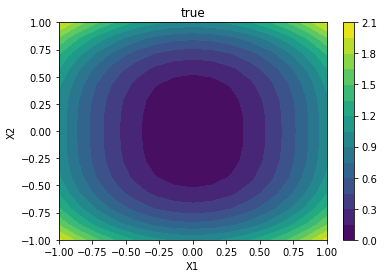

In [4]:
grid = 15
x1 = np.linspace(bounds[0][0], bounds[0][1], grid)
x2 = np.linspace(bounds[1][0], bounds[1][1], grid)
X1, X2 = np.meshgrid(x1, x2)
_X = np.hstack((X1.reshape(grid*grid,1),X2.reshape(grid*grid,1)))
_Y = objective_true.f(_X)

plt.figure()    
plt.contourf(X1, X2, _Y.reshape((grid,grid)),grid)
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("true")
plt.show()

In [5]:
fmin = objective_true.f(minimize(objective_true.f,bounds,grid=500))[0][0]

In [6]:
fmin

4.024096320962257e-06

In [7]:
obj_f = objective_true.f
kernel = GPy.kern.RBF(2, ARD=True)
seed = 2
np.random.seed(seed=seed)

h=1
N_q=5
N = 5
init_n=0
initpoints = [np.array([[0.8, 0.8]]), np.array([[-0.98, 0]]), np.array([[0, -0.98]])]

n = 3
queriesei = {}
valuesei={}
gapsei=[]
queriesro = {}
valuesro={}
gapsro=[]

for i in range(n):
    print("n_ei",i)
    initpoint = initpoints[i]
    _query, _value = bayesianOptimization(obj_f,
                                          ei,
                                          bounds,
                                          depth_h = h,
                                          N = N,
                                          initial_n=init_n,
                                          initpoint = initpoint,
                                          N_q = N_q,
                                          ARD_Flag = False,
                                          length_scale = 0.1
                                          )
    queriesei[i] = _query
    valuesei[i] = _value
    gapsei.append(gap(_value, fmin=fmin))

for i in range(n):
    print("n_rollout", i)
    _query, _value = bayesianOptimization(obj_f,
                                          rollout_utility_archive,
                                          bounds,
                                          depth_h = h,
                                          N = N,
                                          initial_n=init_n,
                                          initpoint = initpoint,
                                          N_q = N_q,
                                          decay_rate=1.,
                                          ARD_Flag = False,
                                          length_scale = 0.1
                                          )
    queriesro[i] = _query
    valuesro[i] = _value
    gapsro.append(gap(_value, fmin=fmin))


n_ei 0
0
1
2
3
4
n_ei 1
0
1
2
3
4
n_ei 2
0
1
2
3
4
n_rollout 0
0
1
2
3
4
n_rollout 1
0
1
2
3
4
n_rollout 2
0
1
2
3
4


In [8]:
gapsei

[0.9880959679414244, 0.9857211011160224, 0.985429693770428]

In [9]:
np.mean(gapsei)

0.9864155876092916

In [10]:
gapsro

[0.8425987923298881, 0.8425987923298881, 0.8425987923298881]

In [11]:
queriesro

{0: array([[ 0.        , -0.98      ],
        [-0.11111111, -0.77777778],
        [-1.        , -1.        ],
        [-1.        , -0.77777778],
        [-1.        ,  1.        ],
        [-0.33333333,  0.33333333]]), 1: array([[ 0.        , -0.98      ],
        [-0.11111111, -0.77777778],
        [-1.        , -1.        ],
        [-1.        , -0.77777778],
        [-1.        ,  1.        ],
        [-0.33333333,  0.33333333]]), 2: array([[ 0.        , -0.98      ],
        [-0.11111111, -0.77777778],
        [-1.        , -1.        ],
        [-1.        , -0.77777778],
        [-1.        ,  1.        ],
        [-0.33333333,  0.33333333]])}

In [40]:
import pickle
with open('rollout_pow_h1Nq5r5.pickle', mode='wb') as f:
     pickle.dump(queriesro, f)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
gapsei

[0.9880959679414244, 0.9857211011160224, 0.985429693770428]

In [19]:
gapsro

[0.8425987923298881, 0.8425987923298881, 0.8425987923298881]

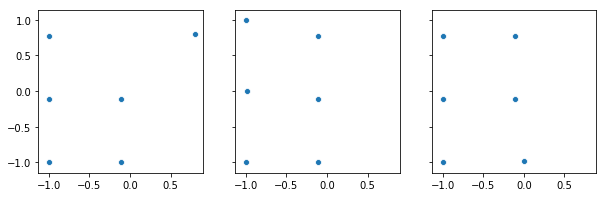

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True,figsize=(10,3))

sns.scatterplot(queriesei[0][:,0],queriesei[0][:,1], ax =ax1)
sns.scatterplot(queriesei[1][:,0],queriesei[1][:,1], ax =ax2)
sns.scatterplot(queriesei[2][:,0],queriesei[2][:,1], ax =ax3)

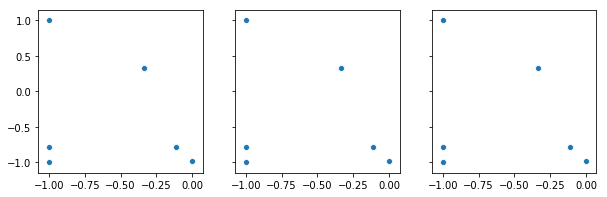

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True,figsize=(10,3))

sns.scatterplot(queriesro[0][:,0],queriesro[0][:,1], ax =ax1)
sns.scatterplot(queriesro[1][:,0],queriesro[1][:,1], ax =ax2)
sns.scatterplot(queriesro[2][:,0],queriesro[2][:,1], ax =ax3)

In [17]:
print("meanEI", np.mean(gapsei))
print("meanRO", np.mean(gapsro))

meanEI 0.9864155876092916
meanRO 0.8425987923298881
